In [1]:
!pip install gprofiler-official pandas seaborn matplotlib

In [2]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from matplotlib_venn import venn3
from gprofiler import GProfiler
from google.colab import files
import os
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [3]:
uploaded = files.upload()

Saving Upregulated_DEGs.csv to Upregulated_DEGs.csv


In [4]:
filtered_genes = pd.read_csv("Upregulated_DEGs.csv")

In [5]:
filtered_genes

,Gene,log2FC,p-value,adj_p-value
0,CDT1,1.990346,1.054444e-05,0.000612
1,CDC25B,1.819140,8.742672e-04,0.009077
2,GJB3,1.731946,2.151222e-04,0.003400
3,RAC1,1.251719,1.532393e-03,0.013495
4,POLD1,1.174322,1.346576e-03,0.012296
...,...,...,...,...
559,ASPM,2.344134,6.901622e-07,0.000187
560,AGT,1.469028,1.540707e-05,0.000736
561,CD46,1.141880,9.695538e-04,0.009707
562,SOX4,1.918485,2.119578e-04,0.003371


In [6]:
filtered_genes.columns

Index(['Gene', 'log2FC', 'p-value', 'adj_p-value'], dtype='object')

In [7]:
df_filtered = filtered_genes.drop(columns=['log2FC', 'p-value', 'adj_p-value'])

In [8]:
gcna_filtered_genes = df_filtered['Gene'].tolist()

In [9]:
len(gcna_filtered_genes)

564

In [10]:
gcna_filtered_genes

['CDT1',
 'CDC25B',
 'GJB3',
 'RAC1',
 'POLD1',
 'ACTR5',
 'EZH2',
 'NUP160',
 'CSTF2',
 'GZMB',
 'PFKFB4',
 'TEX10',
 'CCL24',
 'NEK2',
 'DHCR7',
 'CASK',
 'SLC7A11',
 'TAF1A',
 'PLAU',
 'RUVBL1',
 'WDR4',
 'CCL20',
 'EREG',
 'PODXL2',
 'SEC23B',
 'TRIM29',
 'AHCY',
 'XPO4',
 'ADNP',
 'RAD54L',
 'RFC3',
 'DPM1',
 'RFC5',
 'MFAP2',
 'EXOSC5',
 'UCHL3',
 'LACTB2',
 'PAQR4',
 'GAD1',
 'SHMT2',
 'DDIT4',
 'TFDP1',
 'CSF2',
 'PTK7',
 'WNT11',
 'RANGAP1',
 'ASPHD1',
 'C1GALT1',
 'PUS1',
 'GPX2',
 'AP1S1',
 'LFNG',
 'MCM7',
 'KIAA0101',
 'CDC20',
 'TGFBI',
 'EPHA1',
 'TCF3',
 'CENPF',
 'CHEK1',
 'ELK4.1',
 'SKP2',
 'CADPS',
 'BCL11B',
 'ITGA2',
 'CSE1L',
 'IFRD2',
 'CDKN3',
 'DACH1',
 'HYAL3',
 'SLC25A15',
 'FOXA2',
 'PDCD5',
 'AKR1C4',
 'LRRC8E',
 'MIPEP',
 'PPP1R13L',
 'ILF3',
 'GTF2IRD1',
 'RAD54B',
 'ARID3A',
 'RAD51AP1',
 'DPEP1',
 'CPNE1',
 'F12',
 'PSRC1',
 'COL10A1',
 'WDR62',
 'DDN',
 'SLC6A6',
 'PBK',
 'HSP90AB1',
 'EXO1',
 'FAM57A',
 'NUP205',
 'ATIC',
 'ATP11A',
 'CHAF1B',
 'PPAT

In [11]:
df = pd.DataFrame({"Genes": gcna_filtered_genes})

In [12]:
df

,Genes
0,CDT1
1,CDC25B
2,GJB3
3,RAC1
4,POLD1
...,...
559,ASPM
560,AGT
561,CD46
562,SOX4


In [13]:
gp = GProfiler(return_dataframe=True)
gene_list = gcna_filtered_genes

In [14]:
reac_results = gp.profile(organism='hsapiens', query=gene_list, sources=["REAC"])

print(reac_results.head())

  source              native  \
0   REAC    REAC:R-HSA-69278   
1   REAC  REAC:R-HSA-1640170   
2   REAC    REAC:R-HSA-69620   
3   REAC   REAC:R-HSA-453279   
4   REAC   REAC:R-HSA-176187   

                                                name       p_value  \
0                                Cell Cycle, Mitotic  8.141656e-17   
1                                         Cell Cycle  5.788805e-16   
2                             Cell Cycle Checkpoints  2.360203e-10   
3               Mitotic G1 phase and G1/S transition  5.529776e-09   
4  Activation of ATR in response to replication s...  5.949343e-09   

   significant                                        description  term_size  \
0         True                                Cell Cycle, Mitotic        549   
1         True                                         Cell Cycle        679   
2         True                             Cell Cycle Checkpoints        289   
3         True               Mitotic G1 phase and G1/S transition 

In [15]:
reac_results.shape

(52, 14)

In [16]:
kegg_results = gp.profile(organism='hsapiens', query=gene_list, sources=["KEGG"])

print(kegg_results.head())

  source      native                     name       p_value  significant  \
0   KEGG  KEGG:04110               Cell cycle  2.200577e-14         True   
1   KEGG  KEGG:03030          DNA replication  1.536875e-09         True   
2   KEGG  KEGG:03430          Mismatch repair  1.556190e-03         True   
3   KEGG  KEGG:04657  IL-17 signaling pathway  3.723836e-03         True   
4   KEGG  KEGG:03410     Base excision repair  2.123953e-02         True   

               description  term_size  query_size  intersection_size  \
0               Cell cycle        157         316                 33   
1          DNA replication         36         316                 14   
2          Mismatch repair         23         316                  7   
3  IL-17 signaling pathway         92         316                 13   
4     Base excision repair         44         316                  8   

   effective_domain_size  precision    recall    query       parents  
0                   8484   0.104430  0.

In [17]:
kegg_results.shape

(7, 14)

In [18]:
kegg_results.columns

Index(['source', 'native', 'name', 'p_value', 'significant', 'description',
       'term_size', 'query_size', 'intersection_size', 'effective_domain_size',
       'precision', 'recall', 'query', 'parents'],
      dtype='object')

In [19]:
total_genes= len(gcna_filtered_genes)
print("Total Upregulated genes: ",total_genes)

Total Upregulated genes:  564


In [20]:
def process_go_category(source, enrichment_results):
    df = enrichment_results[enrichment_results['source'] == source][["source","native", "name", "intersection_size", "p_value"]].head(10)
    df["%"] = (df["intersection_size"] / total_genes)
    #df["p_value"] = df["p_value"].apply(lambda x: f"{x:.50f}")

    df = df[["source","native", "name", "%", "p_value"]]  # Keep only required columns
    df.columns = ["Category","ID", "Term", "%", "p-value"]
    return df

In [21]:
reac_terms = process_go_category('REAC', reac_results)
kegg_terms = process_go_category('KEGG', kegg_results)

In [22]:
reac_terms

,Category,ID,Term,%,p-value
0,REAC,REAC:R-HSA-69278,"Cell Cycle, Mitotic",0.118794,8.141656e-17
1,REAC,REAC:R-HSA-1640170,Cell Cycle,0.131206,5.788805e-16
2,REAC,REAC:R-HSA-69620,Cell Cycle Checkpoints,0.069149,2.360203e-10
3,REAC,REAC:R-HSA-453279,Mitotic G1 phase and G1/S transition,0.046099,5.529776e-09
4,REAC,REAC:R-HSA-176187,Activation of ATR in response to replication s...,0.024823,5.949343e-09
5,REAC,REAC:R-HSA-69206,G1/S Transition,0.042553,1.396535e-08
6,REAC,REAC:R-HSA-69190,DNA strand elongation,0.021277,2.053526e-07
7,REAC,REAC:R-HSA-69242,S Phase,0.042553,1.303704e-06
8,REAC,REAC:R-HSA-141444,Amplification of signal from unattached kine...,0.031915,1.468313e-06
9,REAC,REAC:R-HSA-141424,Amplification of signal from the kinetochores,0.031915,1.468313e-06


In [ ]:
kegg_terms

,Category,ID,Term,%,p-value
0,KEGG,KEGG:04110,Cell cycle,0.058511,2.409274e-14
1,KEGG,KEGG:03030,DNA replication,0.024823,1.596578e-09
2,KEGG,KEGG:03430,Mismatch repair,0.012411,1.581417e-03
3,KEGG,KEGG:04657,IL-17 signaling pathway,0.023050,3.831389e-03
4,KEGG,KEGG:03410,Base excision repair,0.014184,2.160716e-02
5,KEGG,KEGG:04914,Progesterone-mediated oocyte maturation,0.021277,4.509775e-02
6,KEGG,KEGG:05323,Rheumatoid arthritis,0.019504,4.631805e-02


In [23]:
reac_terms.to_csv("Up_Top10_REAC.csv", index=False)
kegg_terms.to_csv("Up_Top10_KEGG.csv", index=False)

In [ ]:
files.download("Up_Top10_REAC.csv")
files.download("Up_Top10_KEGG.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
top10 = pd.concat([reac_terms, kegg_terms])
top10['Category'] = top10['Category']
top10.to_csv("Up_Top10_REAC_KEGG_All.csv", index=False)

print(top10)

  Category                  ID  \
0     REAC    REAC:R-HSA-69278   
1     REAC  REAC:R-HSA-1640170   
2     REAC    REAC:R-HSA-69620   
3     REAC   REAC:R-HSA-453279   
4     REAC   REAC:R-HSA-176187   
5     REAC    REAC:R-HSA-69206   
6     REAC    REAC:R-HSA-69190   
7     REAC    REAC:R-HSA-69242   
8     REAC   REAC:R-HSA-141444   
9     REAC   REAC:R-HSA-141424   
0     KEGG          KEGG:04110   
1     KEGG          KEGG:03030   
2     KEGG          KEGG:03430   
3     KEGG          KEGG:04657   
4     KEGG          KEGG:03410   
5     KEGG          KEGG:04914   
6     KEGG          KEGG:05323   

                                                Term         %       p-value  
0                                Cell Cycle, Mitotic  0.118794  8.141656e-17  
1                                         Cell Cycle  0.131206  5.788805e-16  
2                             Cell Cycle Checkpoints  0.069149  2.360203e-10  
3               Mitotic G1 phase and G1/S transition  0.046099  5.52977

In [ ]:
files.download("Up_Top10_REAC_KEGG_All.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Bar Plot with % and -log10(p-value) as Color

In [25]:
top10_reac = reac_terms.nlargest(10, 'p-value')
top10_kegg = kegg_terms.nlargest(10, 'p-value')

### Function to create bar plot

In [26]:
def plot_go_terms(data, category, color_palette,save_path):

    fig, ax = plt.subplots(figsize=(12, 5))
    #data = data.sort_values("p-value", ascending=True)  # Highest p-value at top, lowest at bottom


    # Normalize p-values for color mapping
    norm = mcolors.LogNorm(vmin=data["p-value"].min(), vmax=data["p-value"].max())
    cmap = plt.get_cmap(color_palette)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    sns.barplot(
        data=data,
        x="p-value",
        y="Term",
        hue="Term",
        dodge=False,
        palette=color_palette,
        legend=False,
        ax=ax
    )
    #data = data.sort_values("p-value", ascending=False)  # Highest p-value at top, lowest at bottom

    ax.set_xlabel("P-value (Lower is better)", fontsize=12)
    ax.set_xscale('log')
    ax.set_ylabel("Terms", fontsize=12)
    ax.set_title(f"Top 10 {category} Terms for upregulated DEGs", fontsize=14)

    min_p = data["p-value"].min()
    max_p = data["p-value"].max()
    ax.set_xlim(min_p * 0.8, max_p * 1.2)
    ax.invert_yaxis()

    # Add color bar
    cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
    cbar.set_label("P-value Scale")

    if save_path is None:
        save_path = f"terms_{category}.png"

    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    print(f"Plot saved as {save_path}")

### Plot BP, MF, and CC separately

Plot for top 10 BP

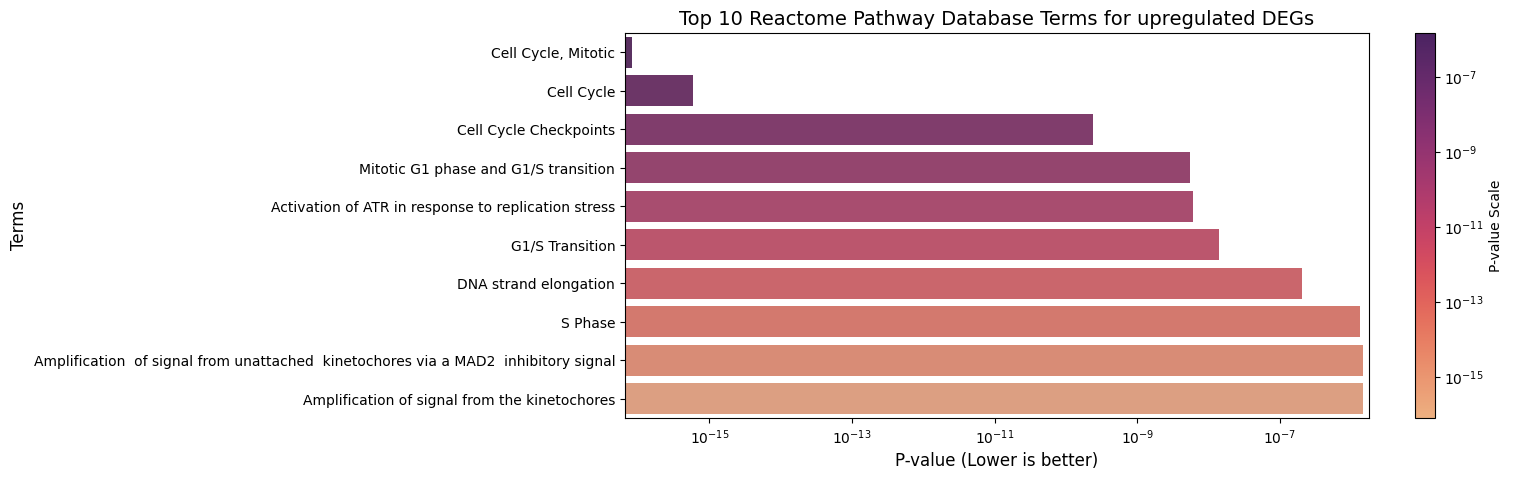

Plot saved as Up_REAC_10.png


In [27]:
plot_go_terms(top10_reac, 'Reactome Pathway Database', 'flare',save_path="Up_REAC_10.png")

Plot for top 10 MF

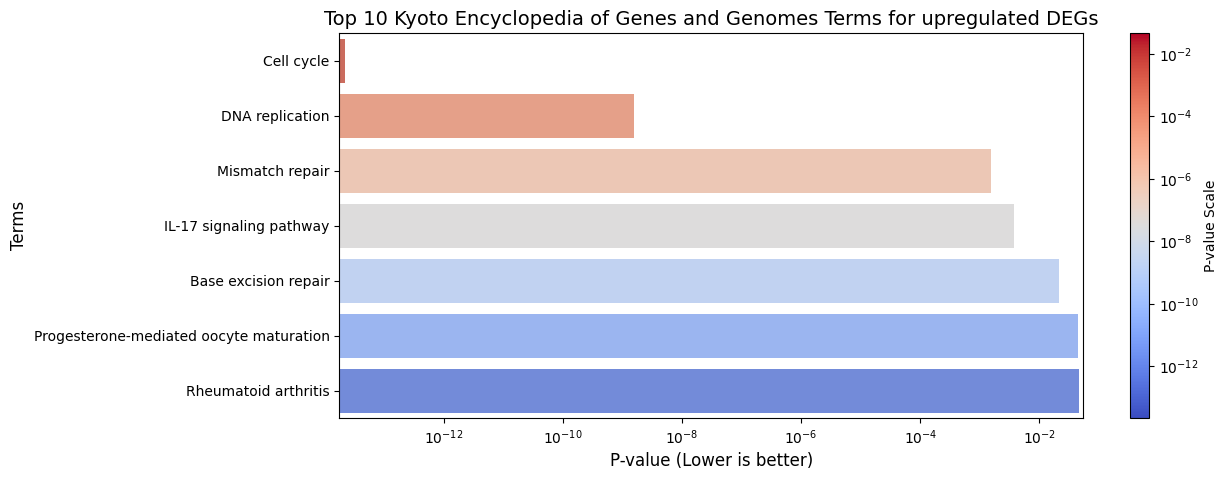

Plot saved as Up_KEGG_10.png


In [28]:
plot_go_terms(top10_kegg, 'Kyoto Encyclopedia of Genes and Genomes','coolwarm',save_path="Up_KEGG_10.png")

Plot for top 10 CC

In [29]:
files.download("Up_REAC_10.png")
files.download("Up_KEGG_10.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>